In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

np.random.seed(42)

N = 150
x1 = np.random.uniform(0, 1, N)
x2 = np.random.uniform(0, 1, N)
x3 = np.random.uniform(0, 1, N)
x4 = np.random.uniform(0, 1, N)

# Funciones verdaderas (algunas irrelevantes para simular seleccion)

f1 = np.sin(2 * np.pi * x1)
f2 = np.cos(4 * np.pi * x2)
f3 = 0.5 * x3**2  # cuadratico
f4 = 0.0 * x4  # irrevevantes (ruido puro)

y = f1 + f2 + f3 + f4 + np.random.normal(0, 0.4, N)


In [8]:
def smoothing_spline_1d(x, y, lambda_smooth=0.01):
    n = len(x)
    sort_idx = np.argsort(x)
    x_sorted = x[sort_idx]
    y_sorted = y[sort_idx]

    D = np.diff(np.eye(n), n=2, axis=0)
    K = D.T @ D
    XtX_lambdaK = np.eye(n) + lambda_smooth * K
    beta = linalg.solve(XtX_lambdaK, y_sorted)

    return beta, sort_idx

In [9]:
lambda_list = [0.01, 0.01, 0.05, 10.0] # λ diferente por predictor (alto en x4 "apagarlo")

f_fits = []
idxs = []

for i in range(4):
    xi = [x1, x2, x3, x4][i]
    lamb = lambda_list[i]
    f_fit, idx = smoothing_spline_1d(xi, y, lamb)
    f_fits.append(f_fit)
    idxs.append(idx)

# Predicion adictiva
y_gam = np.zeros(N)
for i in range(N):
    sum_f = 0
    for j in range(4):
        xj = [x1, x2, x3, x4][j][i]
        idx_j = np.searchsorted([x1, x2, x3, x4][j][idxs[j]], xj)
        idx_j = np.clip(idx_j, 0, len(f_fits[j]) -1)
        sum_f += f_fits[j][idx_j]
    y_gam[i] = sum_f        


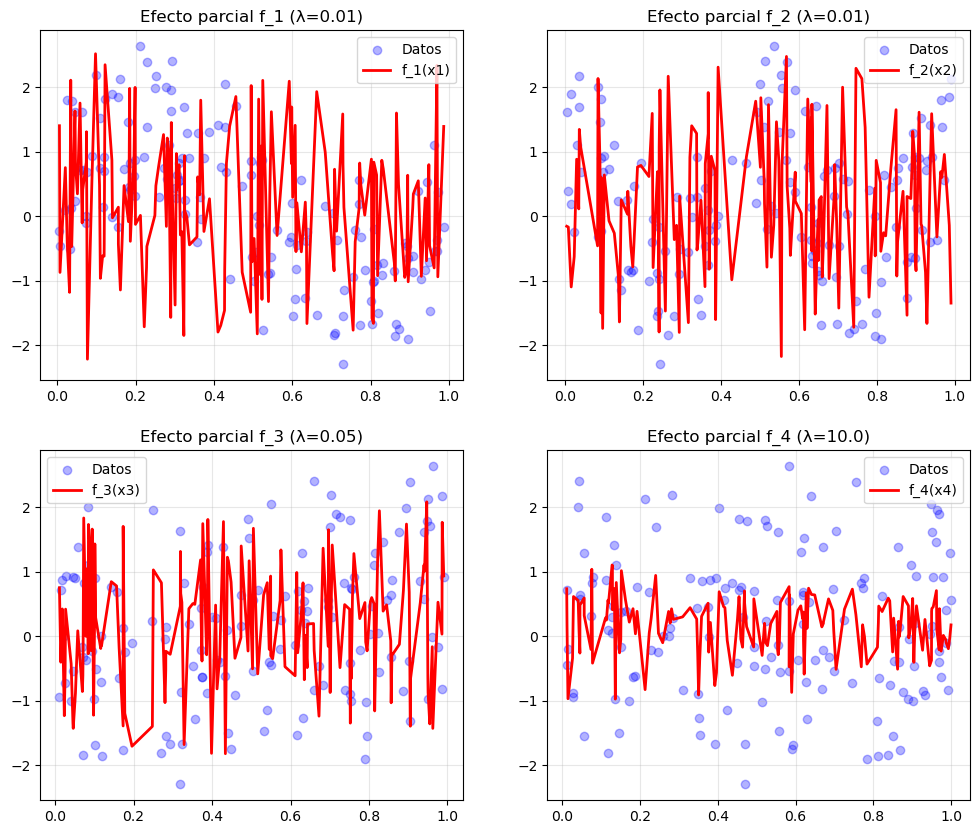

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs = axs.ravel()

for j in range(4):
    xj = [x1, x2, x3, x4][j]
    sort_j = np.argsort(xj)
    axs[j].scatter(xj, y, color='blue', alpha=0.3, label='Datos')
    axs[j].plot(xj[sort_j], f_fits[j][sort_j], 'r-', linewidth=2, label=f'f_{j+1}(x{j+1})')
    axs[j].set_title(f'Efecto parcial f_{j+1} (λ={lambda_list[j]})')
    axs[j].legend()
    axs[j].grid(True, alpha=0.3)